# Missing Data
---
In this notebook we explore the independant and dependant variables, both seperately and with respect to one another. The independant variables here are the molecular descriptors which describe the structure of the molecules that were tested in the 2014 experiment [cite]. The dependant variables here are the perceptual ratings (from 0-100) that the subjects of the above experiment could provide such as "Fruit", "Fish", "Garlic" & "Spices". 

## Imports

In [3]:
# Math/Data Libraries
import scipy
import numpy as np
import pandas as pd

# Visalisation
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

# I/O
import json
import xlrd

# Jupyter/IPython Utility
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Paths

In [4]:
path_to_transformed_data = "../../data/transformed/"
path_to_data = "../../data/"

## Read Data

In [5]:
raw_data = pd.read_pickle(path_to_transformed_data + 'raw_data_full.zip')

## Missing value analysis
---

Below we can see the pattern of missing data. MCAR, MNAR, MAR.

Missing Values - Raw Features


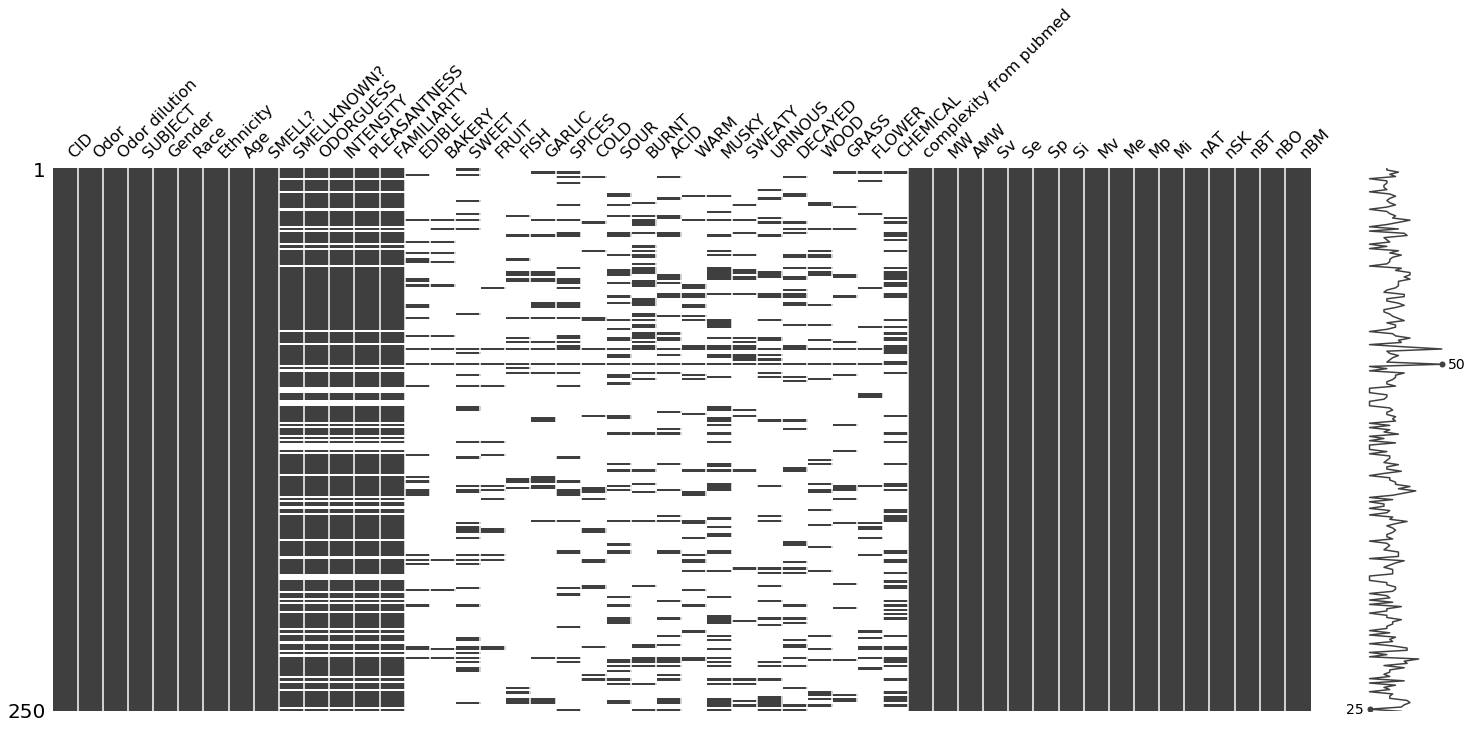

In [6]:
import missingno
missingno.matrix(raw_data.iloc[0:250, 0:50])
print('Missing Values - Raw Features')

## Perceptual Missing data (target features)

Missing Data (Perceptual Responses) - Null Correlation


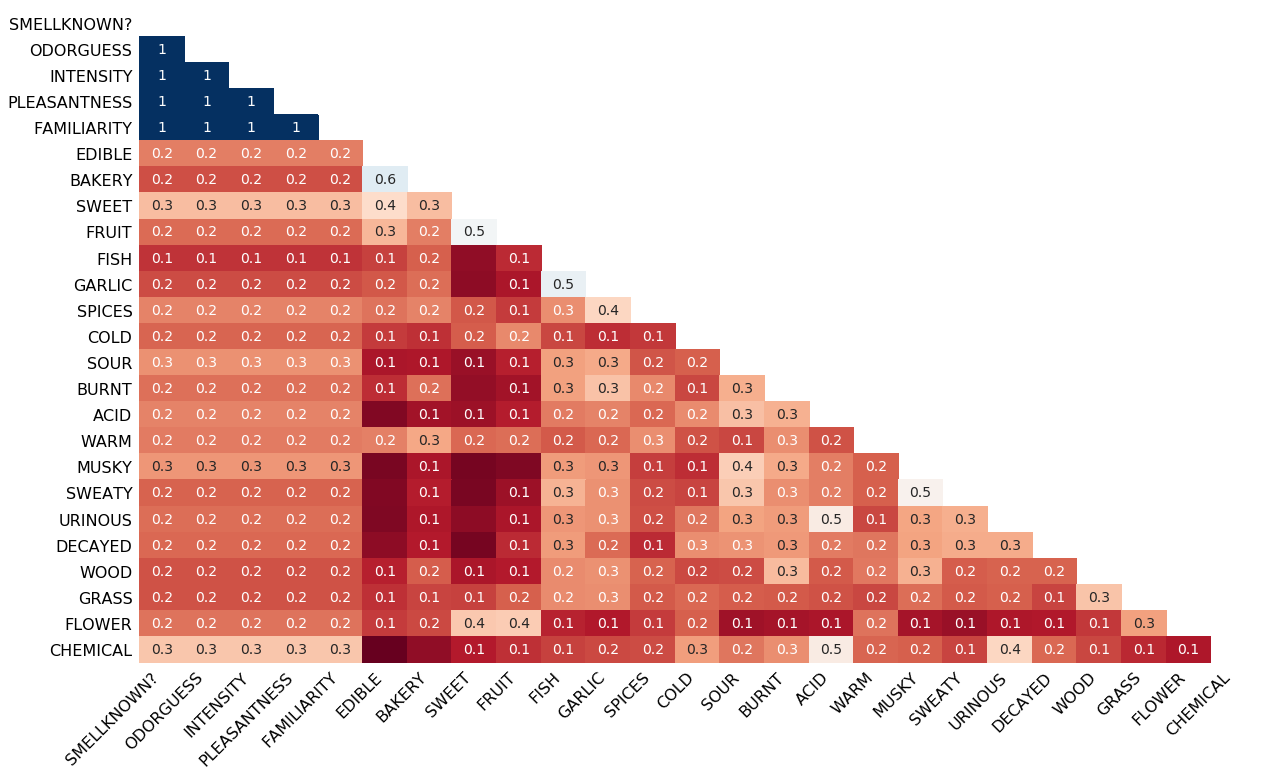

In [7]:
missingno.heatmap(raw_data.iloc[:, 0:34])
print('Missing Data (Perceptual Responses) - Null Correlation')

Dendrogram of null correlation heirarchy (Perceptual)


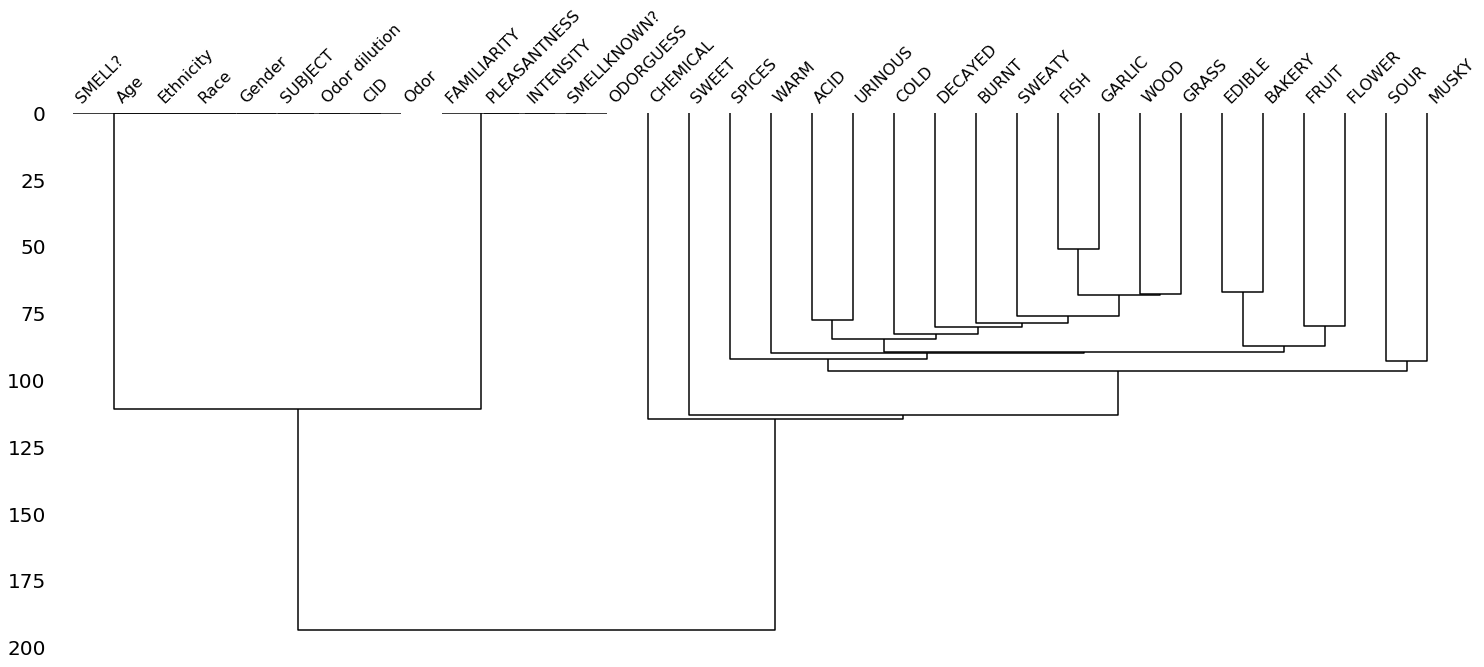

In [8]:
missingno.dendrogram(raw_data.iloc[:, 0:34])
print('Dendrogram of null correlation heirarchy (Perceptual)')

## Molecular Missing data - descriptive features

In [9]:
null_descriptive_cols = raw_data.iloc[:, 35:].isna().sum()
mask250 = null_descriptive_cols > 250
mask0 = null_descriptive_cols > 0 # too many columns to visualise

mask0.value_counts()
mask250.value_counts()


False    2761
True     2107
dtype: int64

False    4742
True      126
dtype: int64

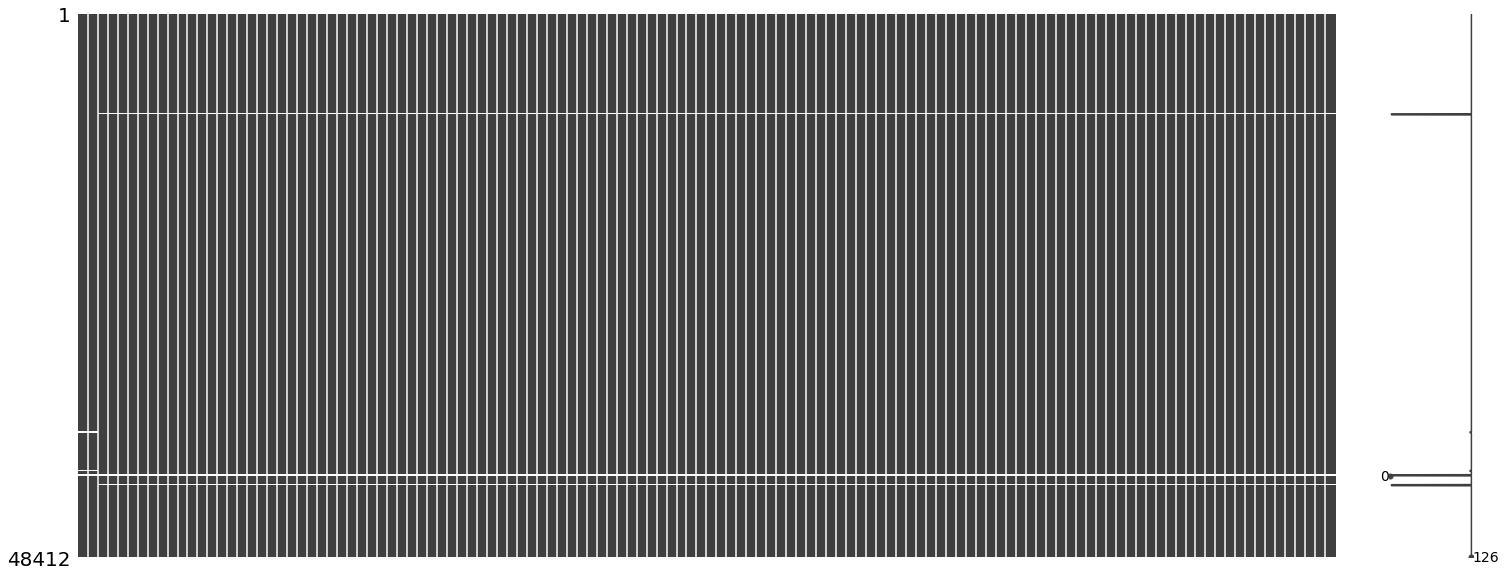

In [10]:
null_cols = raw_data.loc[:, list(null_descriptive_cols.loc(axis=0)[mask250 == True].index)]
missingno.matrix(null_cols)

## Results